In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Data

### donut

In [4]:
def donut():
    N = 1000
    D = 2

    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    return X

In [5]:
X = donut()

# 2. Kmeans

In [9]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost


def plot_k_means(X, K, max_iter=20, beta=1.0, show_plots=True):
    N, D = X.shape
    M = np.zeros((K, D))
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]

    costs = np.zeros(max_iter)
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                # R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum( np.exp(-beta*d(M[j], X[n])) for j in range(K) )
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))

        R = exponents / exponents.sum(axis=1, keepdims=True)
        # assert(np.abs(R - R2).sum() < 1e-10)

        # step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 1e-5:
                break

    # color is 3 dimension
    if show_plots:
        plt.plot(costs)
        
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors) # N * 3
        plt.scatter(X[:,0], X[:,1], c=colors)

        plt.show()

    return M, R

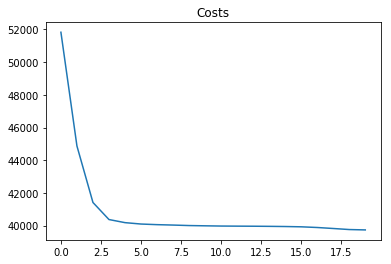

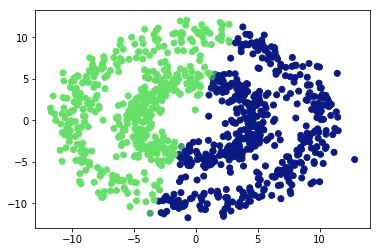

(array([[ 4.50042558, -1.4524057 ],
        [-4.74839518,  1.65353743]]),
 array([[  1.55373473e-43,   1.00000000e+00],
        [  1.00000000e+00,   3.63450694e-53],
        [  1.27700581e-50,   1.00000000e+00],
        ..., 
        [  1.39761791e-68,   1.00000000e+00],
        [  1.00000000e+00,   1.97585541e-50],
        [  1.00000000e+00,   1.75506603e-81]]))

In [10]:
X = donut()
plot_k_means(X, 2)

### Elongated Gaussian

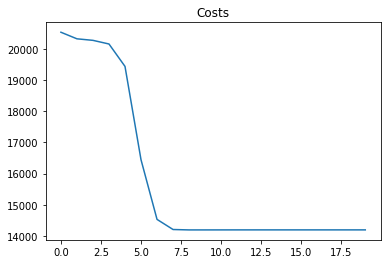

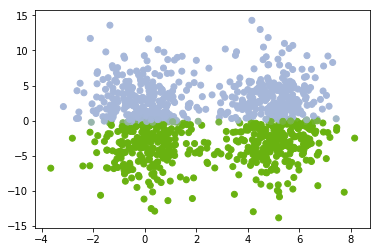

(array([[ 2.65217244, -3.6130897 ],
        [ 2.34916136,  3.36329522]]),
 array([[  1.64957786e-05,   9.99983504e-01],
        [  9.99960010e-01,   3.99903684e-05],
        [  8.87428544e-22,   1.00000000e+00],
        ..., 
        [  2.82531247e-10,   1.00000000e+00],
        [  1.00000000e+00,   6.65979068e-17],
        [  1.00000000e+00,   1.95627673e-66]]))

In [13]:
# elongated clusters
X = np.zeros((1000, 2))
X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
plot_k_means(X, 2)

### Gaussian Different Density

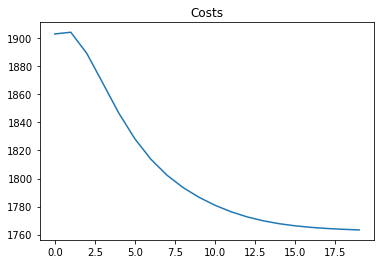

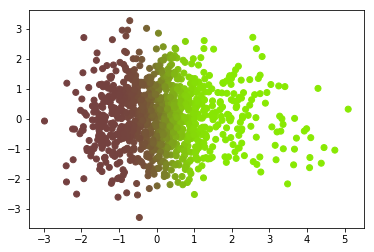

(array([[-0.54117932,  0.01766506],
        [ 1.09773435,  0.07741146]]),
 array([[  8.86514681e-01,   1.13485319e-01],
        [  9.89459388e-01,   1.05406119e-02],
        [  9.99805649e-01,   1.94351484e-04],
        ..., 
        [  1.45555131e-04,   9.99854445e-01],
        [  2.08277439e-05,   9.99979172e-01],
        [  6.88011759e-06,   9.99993120e-01]]))

In [14]:
X = np.zeros((1000, 2))
X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
plot_k_means(X, 2)